<a href="https://colab.research.google.com/github/igorgatchin1993/Portfolio/blob/main/Learning_portfolio(part2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Glass Type Classification with Machine Learning

# 1. Data preparation

Loading the libraries

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # read and wrangle dataframes
import matplotlib.pyplot as plt # visualization
import seaborn as sns # statistical visualizations and aesthetics
from sklearn.base import TransformerMixin # To create new classes for transformations
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) # preprocessing 
from sklearn.decomposition import PCA # dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox # data transform
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve) # model selection modules
from sklearn.pipeline import Pipeline # streaming pipelines
from sklearn.base import BaseEstimator, TransformerMixin # To create a box-cox transformation class
from collections import Counter
import warnings
# load models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import (XGBClassifier, plot_importance)
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from time import time

%matplotlib inline 
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

Loading and exploring the shape of the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/

/content


In [4]:
!ls

drive  sample_data


In [8]:
import pandas as pd

# Load CSV file into DataFrame
df = pd.read_csv('/content/glass.csv')

# Display the first few rows of the DataFrame
df.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
print(df.shape)

(214, 10)


DF has 214 rows and 10 columns. The dataset consists of 214 observations.

In [9]:
df.head(15)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [ ]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

# 2. Summarize data

Descriptive statistics

Let's first summarize the distribution of the numerical variables.

In [10]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


The features are not on the same scale. For example Si has a mean of 72.65 while Fe has a mean value of 0.057. Features should be on the same scale for algorithms such as logistic regression (gradient descent) to converge smoothly. Let's go ahead and check the distribution of the glass types.

In [ ]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

The dataset is pretty unbalanced. The instances of types 1 and 2 constitute more than 67 % of the glass types.

# Data Visualization

Univariate plots

Let's go ahead an look at the distribution of the different features of this dataset.

In [12]:
# Define the list of features
features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

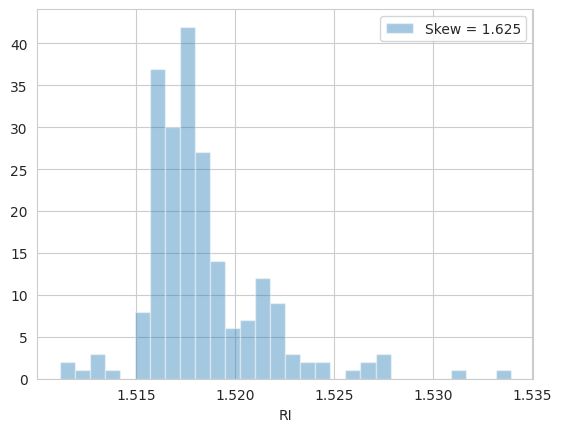

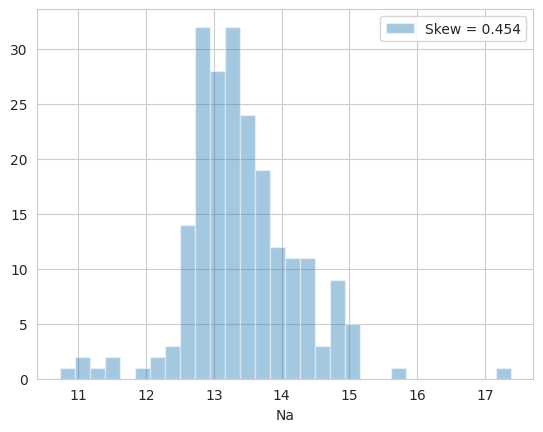

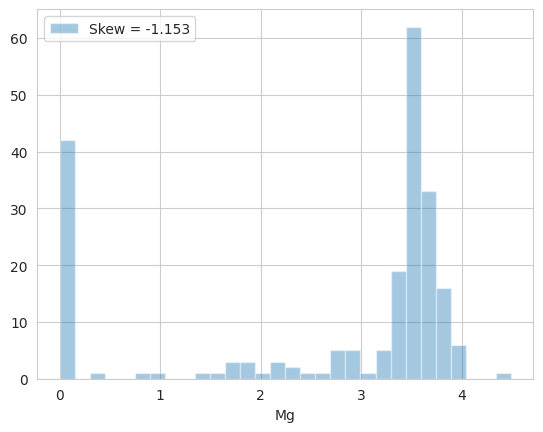

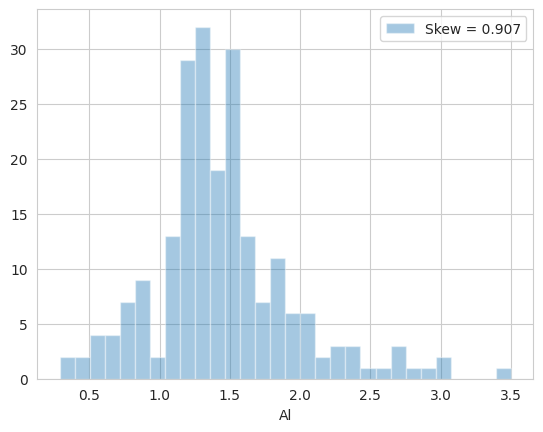

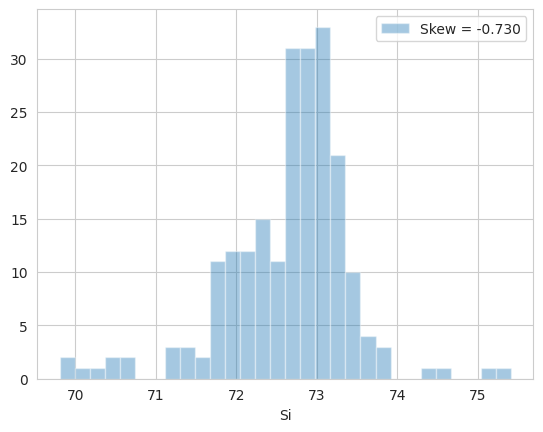

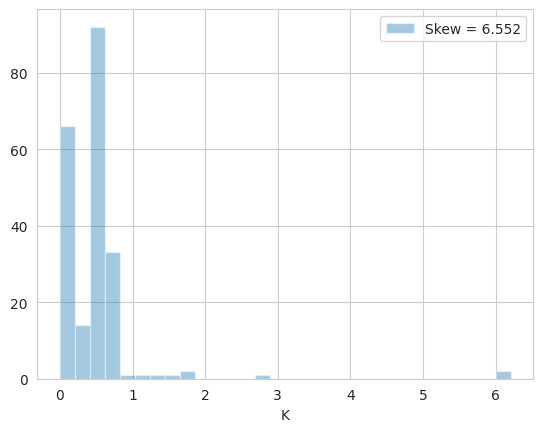

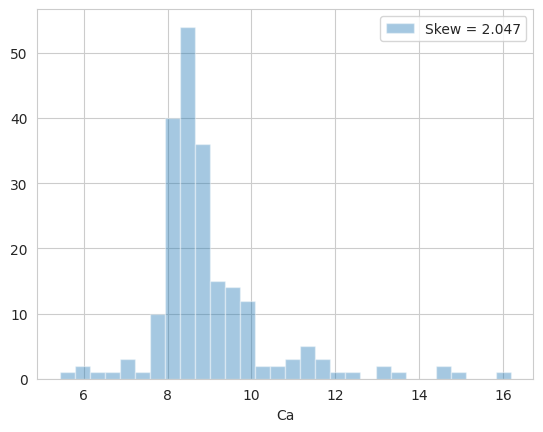

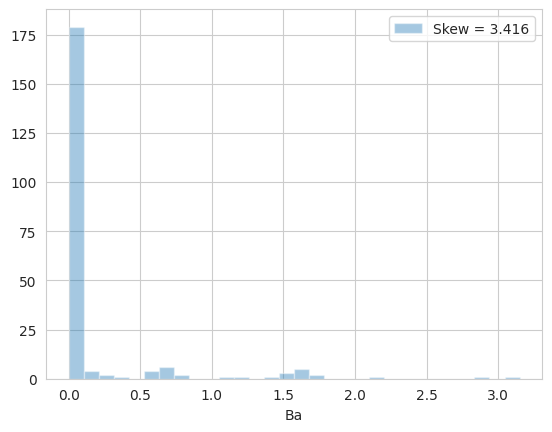

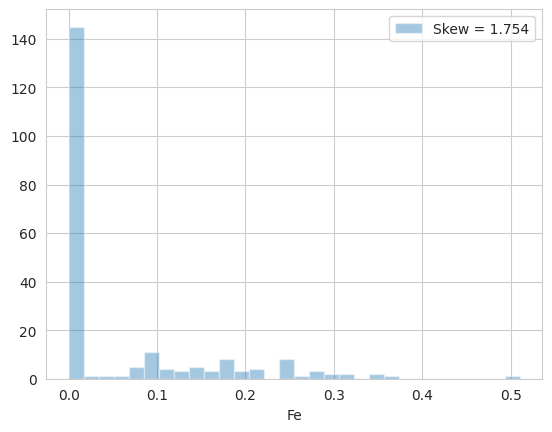

In [13]:
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

None of the features is normally distributed. The features Fe, Ba, Ca and K exhibit the highest skew coefficients. Moreover, the distribution of potassium (K) and Barium (Ba) seem to contain many outliers. Let's identify the indices of the observations containing outliers using Turkey's method.

Turkey's method, also known as the Tukey's fences method or the Tukey's test, is a statistical technique used for identifying outliers in a dataset. It defines a range of values called fences that are used to identify observations that are significantly different from the majority of the data.

In Tukey's method, outliers are identified using the interquartile range (IQR), which is the range between the first quartile (Q1) and the third quartile (Q3) of the data. The method defines an upper fence and a lower fence as follows:


* Upper Fence: Q3 + (1.5 * IQR)

* Lower Fence: Q1 - (1.5 * IQR)

Any observation that falls outside these fences is considered an outlier. The factor of 1.5 is a common choice, but it can be adjusted based on the specific requirements of the analysis.

In [14]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[features]))))   

The dataset contains 14 observations with more than 2 outliers


There exists some 14 observations with multiple outliers. These could harm the efficiency of our learning algorithms. We'll make sure to get rid of these in the next sections.

Let's examine the boxplots for the several distributions.

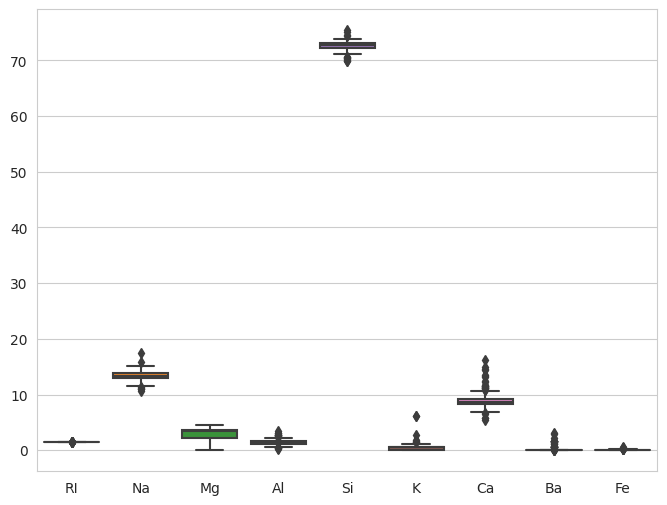

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(df[features])
plt.show()

Unsurprisingly, Silicon has a mean that is much superior to the other constituents as we already saw in the previous section. Well, that is normal since glass is mainly based on silica.

* # Multivariate plots




Let's now proceed by drawing a pairplot to visually examine the correlation between the features.

<Figure size 800x800 with 0 Axes>

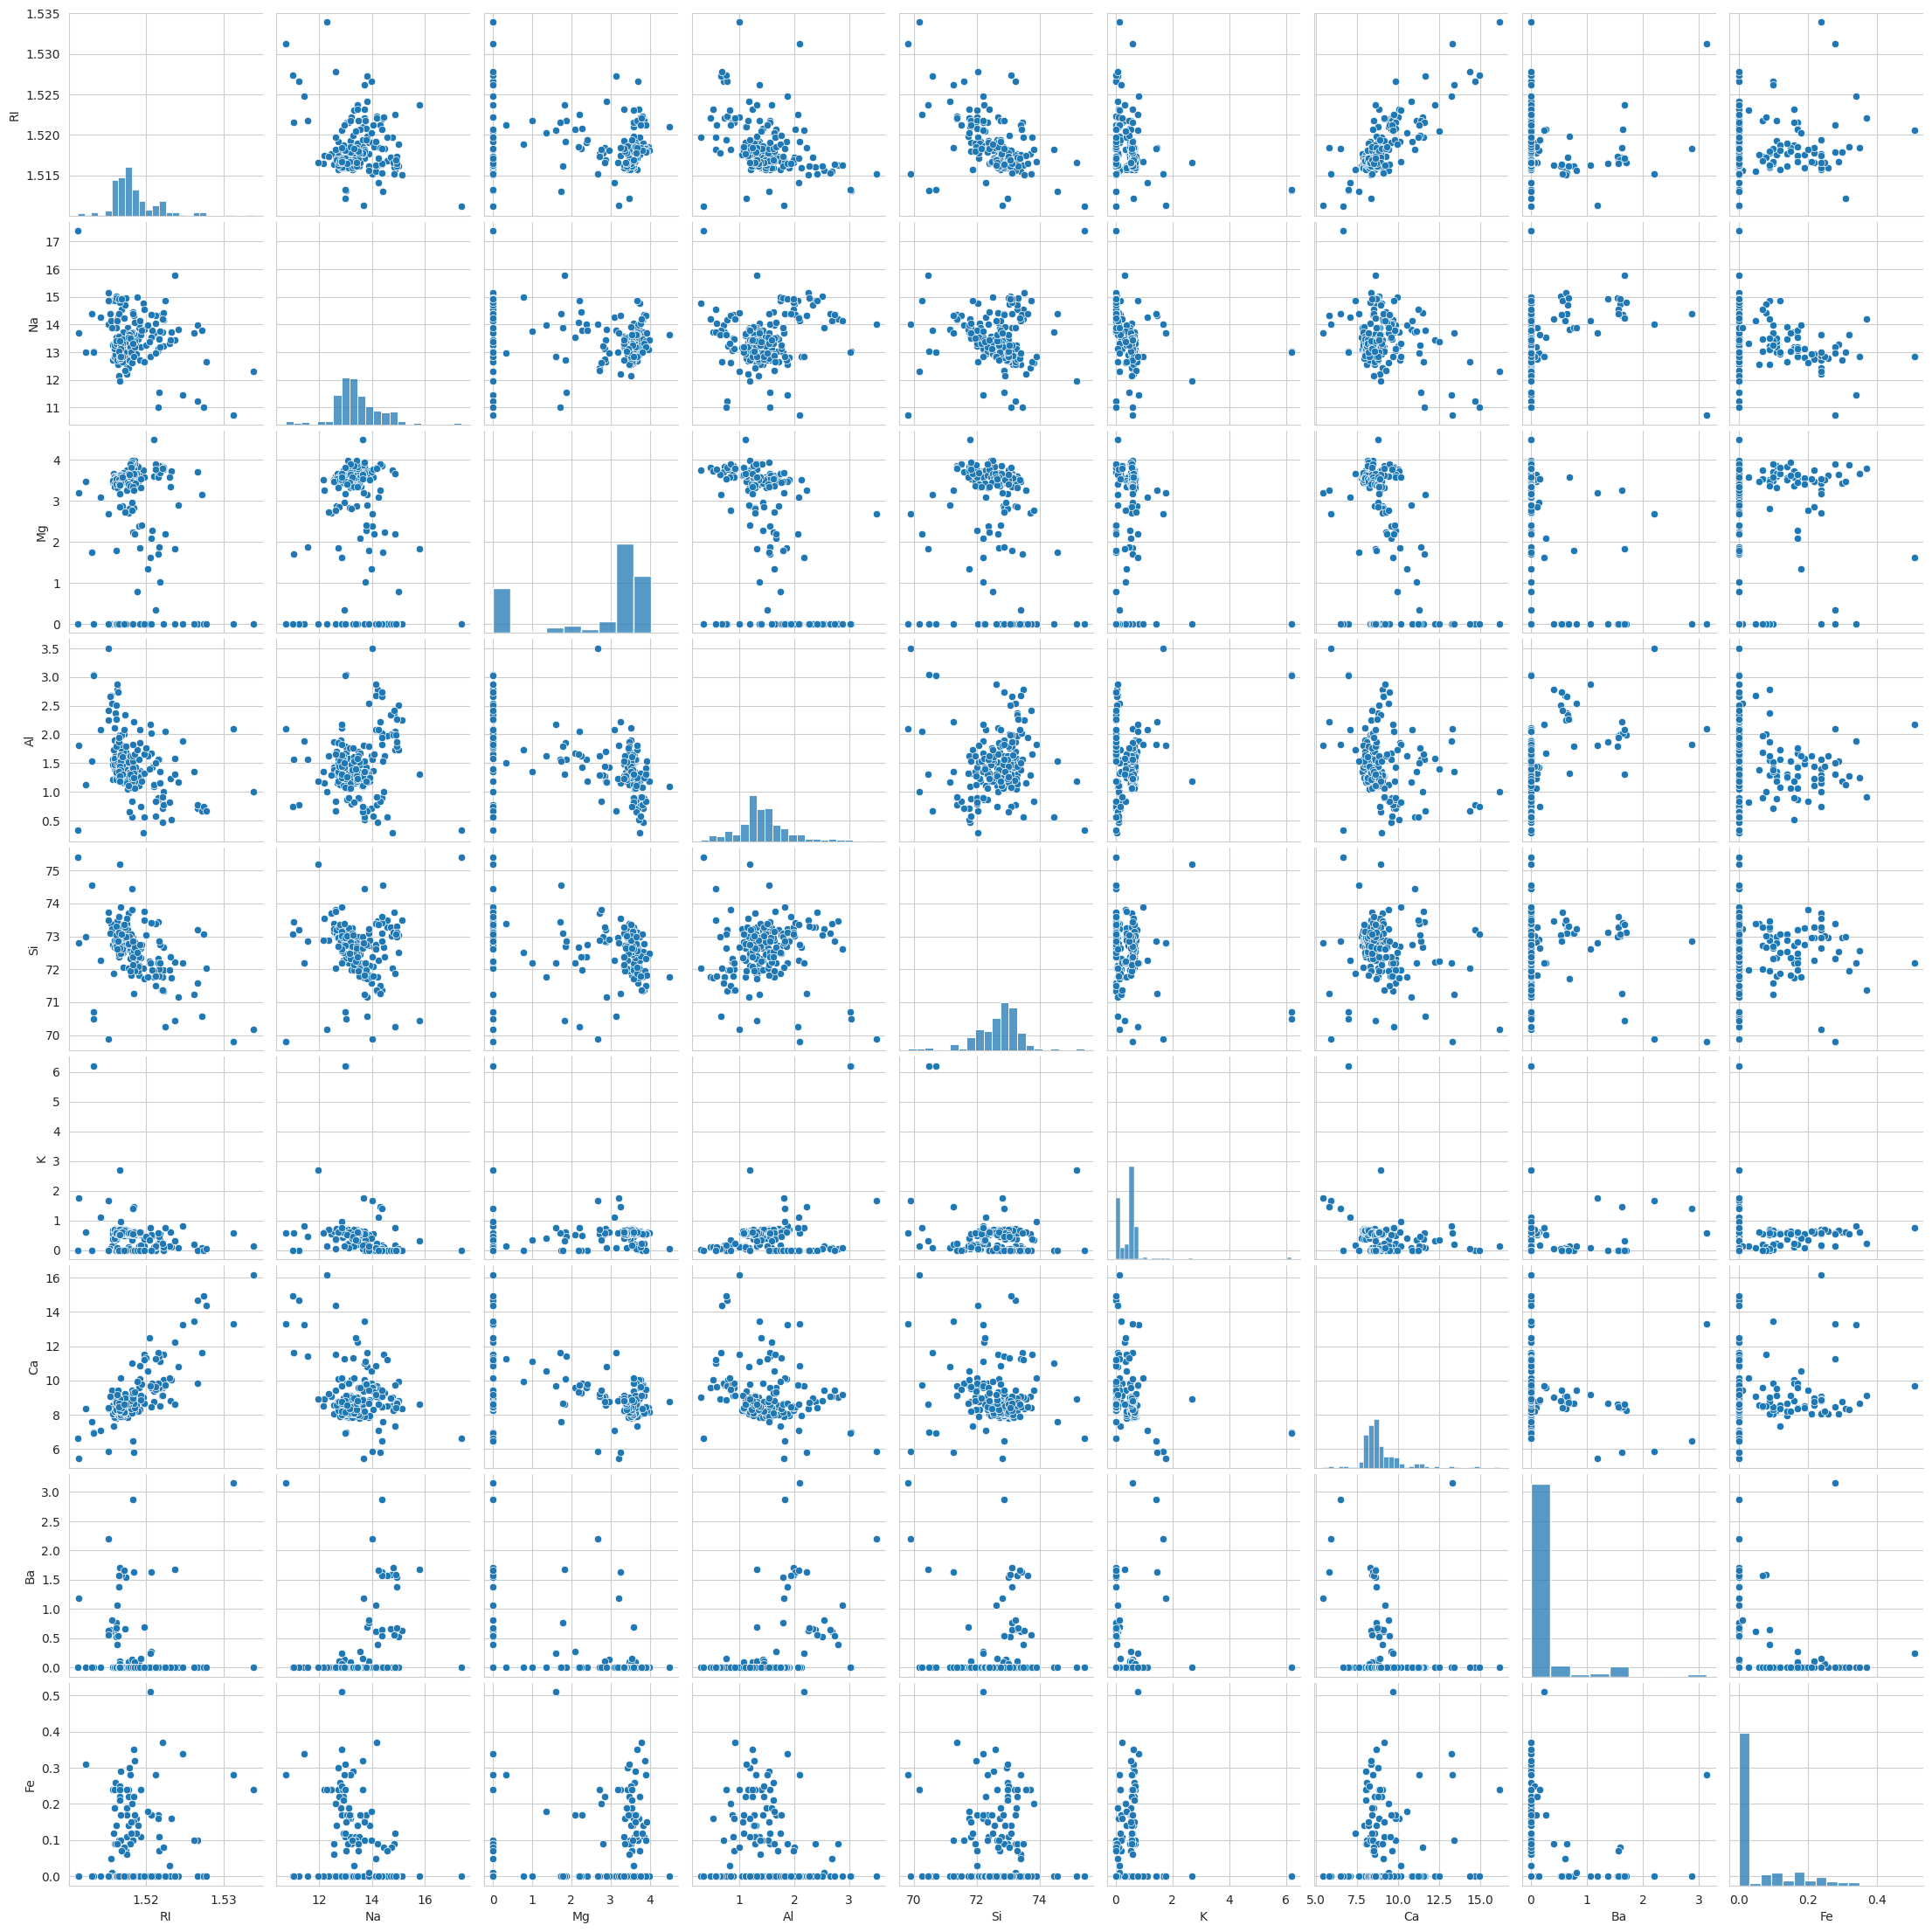

In [16]:
plt.figure(figsize=(8,8))
sns.pairplot(df[features],palette='coolwarm')
plt.show()

A correlation coefficient measures the strength and direction of the linear relationship between two variables. The value of the correlation coefficient ranges from -1 to 1, where:

* -1 represents a perfect negative correlation (as one variable increases, the other decreases linearly),

* 0 represents no correlation (no linear relationship between the variables), 

* 1 represents a perfect positive correlation (as one variable increases, the other increases linearly).

Let's go ahead and examine a heatmap of the correlations.

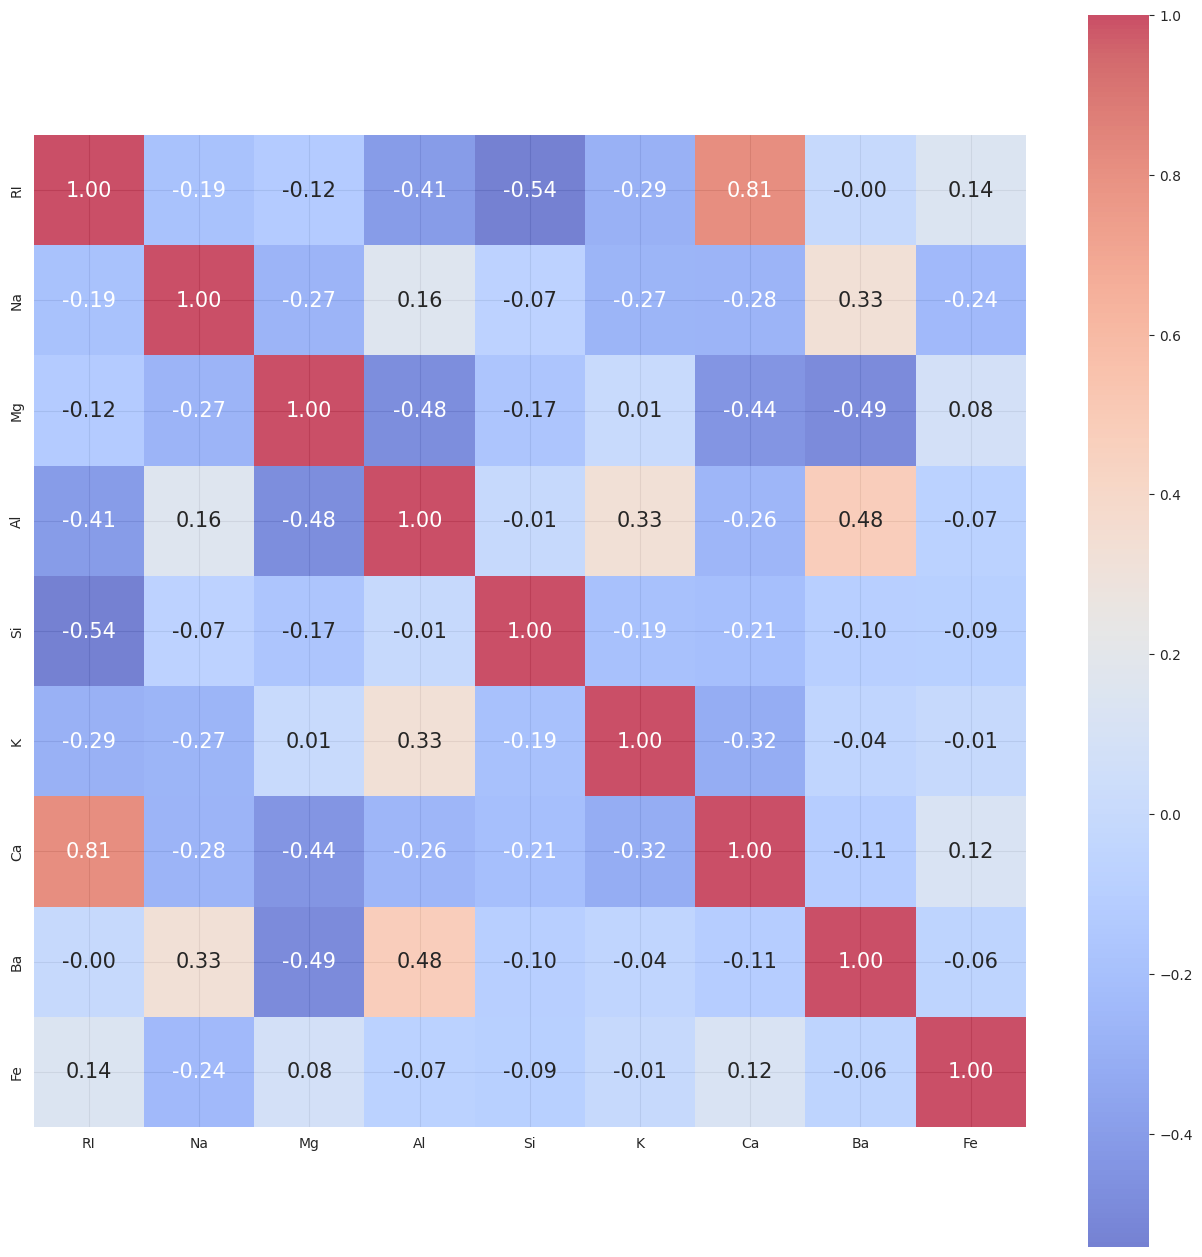

In [17]:
corr = df[features].corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features, alpha = 0.7,   cmap= 'coolwarm')
plt.show()

There seems to be a strong positive correlation between RI and Ca. This could be a hint to perform Principal component analysis in order to decorrelate some of the input features.

# 3. Prepare data

Data cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


This dataset is clean; there aren't any missing values in it.

Hunting and removing multiple outliers

Let's remove the observations containing multiple outliers with the function we created in the previous section.

In [ ]:
outlier_indices = outlier_hunt(df[features])
df = df.drop(outlier_indices).reset_index(drop=True)
print(df.shape)

(200, 10)


Removing observations with multiple outliers (more than 2) leaves us with 200 observations to learn from. Let's now see how our distributions look like.

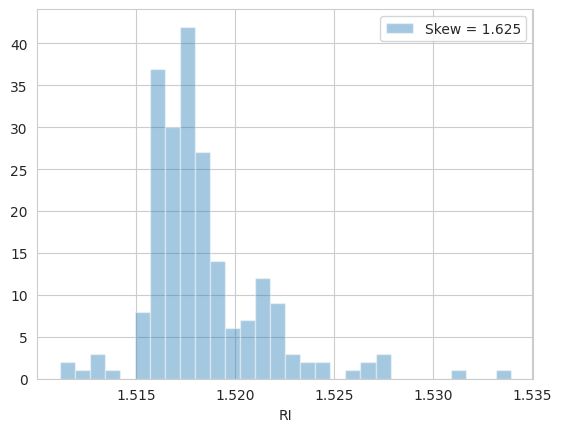

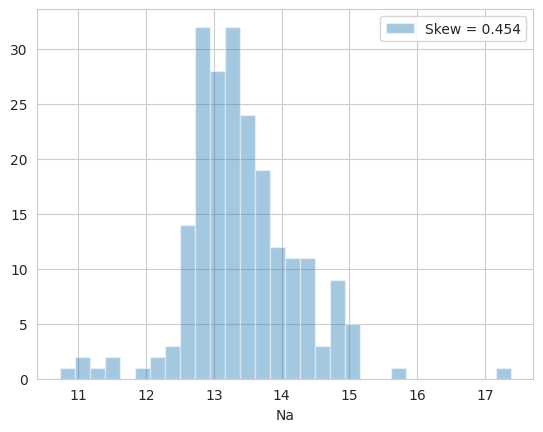

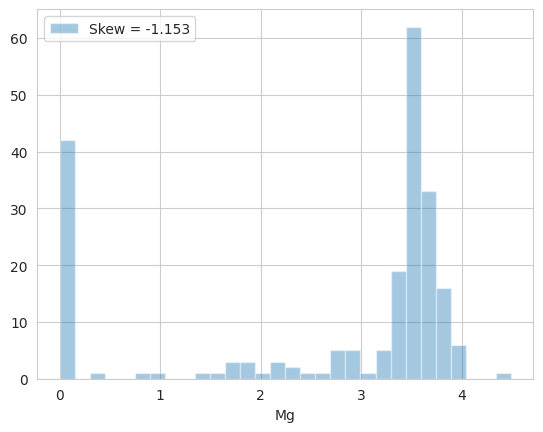

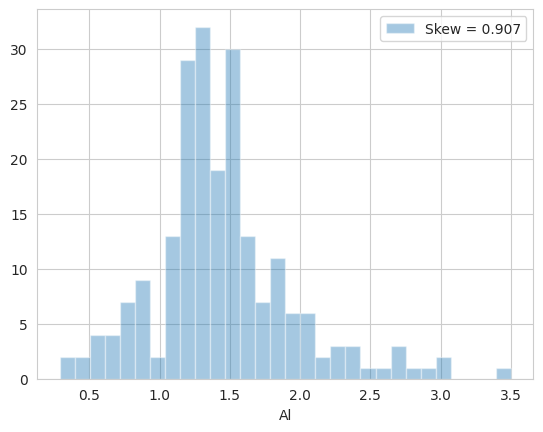

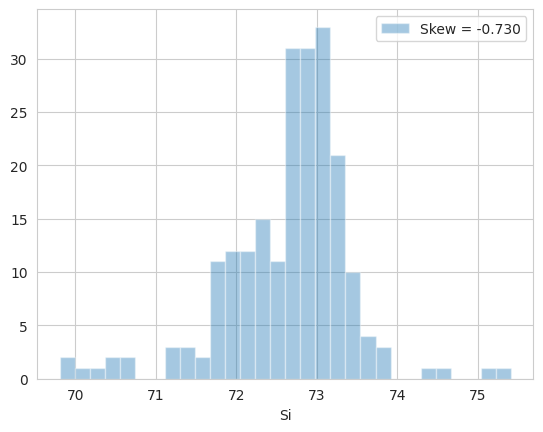

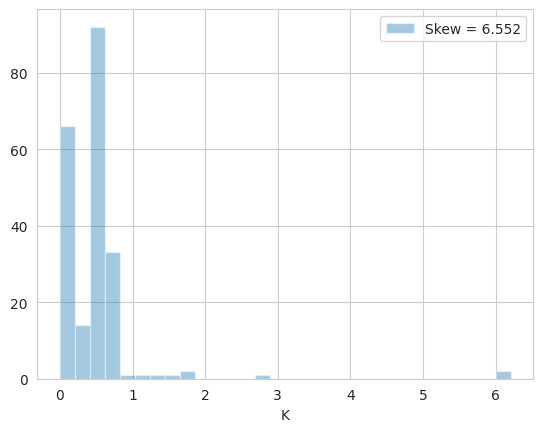

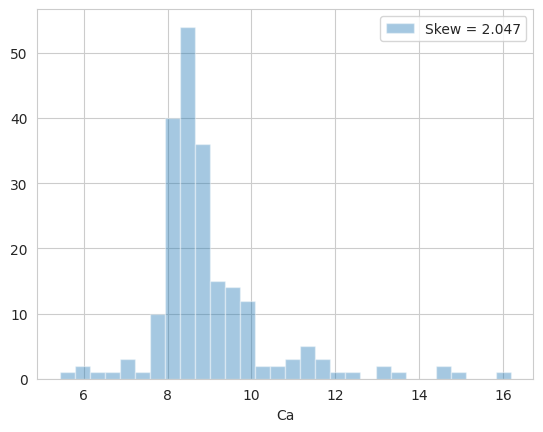

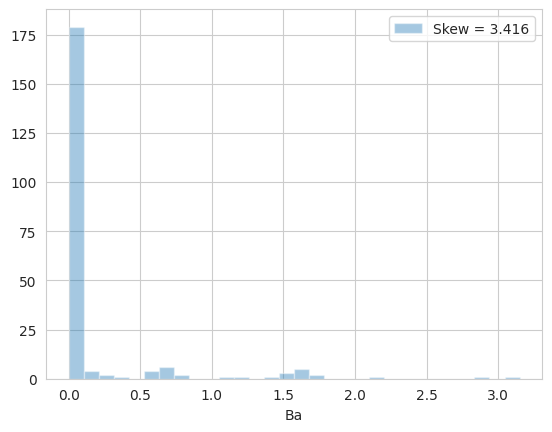

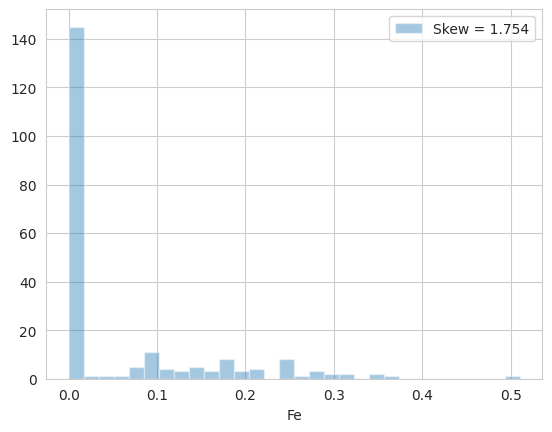

In [20]:
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde=False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [ ]:
df['Type'].value_counts()

1    70
2    70
7    25
3    17
5    10
6     8
Name: Type, dtype: int64

Let's now plot a distribution of the Types.

In [ ]:
df['Type'] = df['Type'].astype(int)

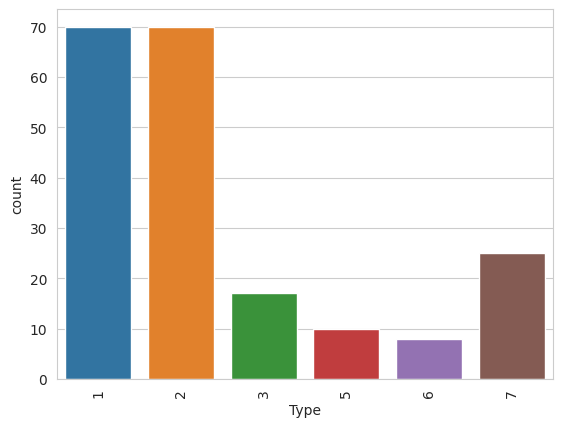

In [ ]:
sns.countplot(x='Type', data=df)
plt.xticks(rotation=90)
plt.show()

- Split-out validation dataset

In [23]:
# Define X as features and y as labels
X = df[features] 
y = df['Type'] 

# Set a seed and a test size for splitting the dataset 
seed = 7
test_size = 0.2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


- Data transformation

Let's examine if a Box-Cox transform can contribute to the normalization of some features. It should be emphasized that all transformations should only be done on the training set to avoid data snooping. Otherwise the test error estimation will be biased.

In [24]:
features_boxcox = []

for feature in features:
    bc_transformed, _ = boxcox(df[feature]+1)  # shift by 1 to avoid computing log of negative values
    features_boxcox.append(bc_transformed)

features_boxcox = np.column_stack(features_boxcox)
df_bc = pd.DataFrame(data=features_boxcox, columns=features)
df_bc['Type'] = df['Type']

In [25]:
df_bc.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,2.140000e+02,214.000000,214.000000,214.000000,2.140000e+02,214.000000,214.000000,214.000000,214.000000,214.000000
mean,8.757099e-04,2.099609,9.485638,0.875325,2.976464e+22,0.278097,0.703271,0.019170,0.018646,2.780374
std,1.086744e-19,0.034261,5.466530,0.200457,3.830370e+21,0.172111,0.005530,0.042242,0.027484,2.103739
min,8.757099e-04,1.973425,0.000000,0.254745,1.797280e+22,0.000000,0.677781,0.000000,0.000000,1.000000
25%,8.757099e-04,2.079212,5.231418,0.784872,2.770766e+22,0.109219,0.700679,0.000000,0.000000,1.000000
50%,8.757099e-04,2.096185,12.350189,0.859826,3.024296e+22,0.358093,0.702500,0.000000,0.000000,2.000000
75%,8.757099e-04,2.118042,13.129628,0.968461,3.181883e+22,0.380233,0.705086,0.000000,0.051278,3.000000
max,8.757099e-04,2.245333,19.718349,1.507653,4.698007e+22,0.870912,0.721187,0.119372,0.067889,7.000000


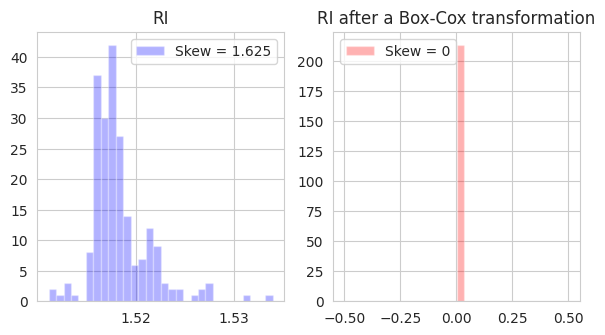

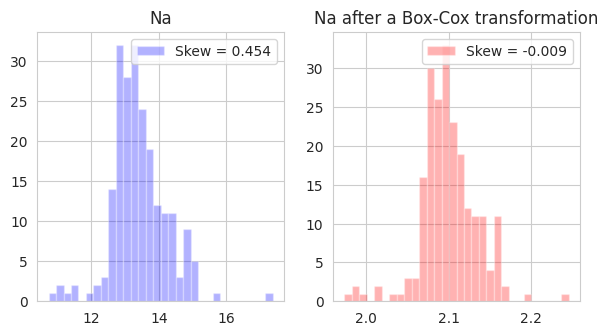

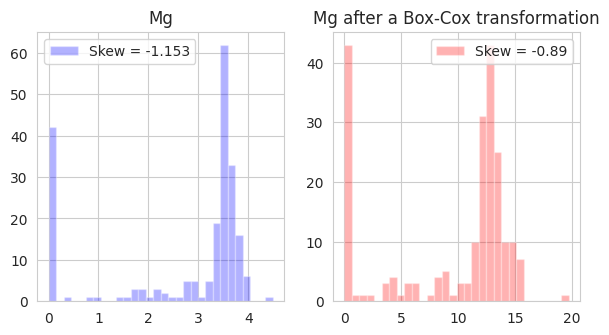

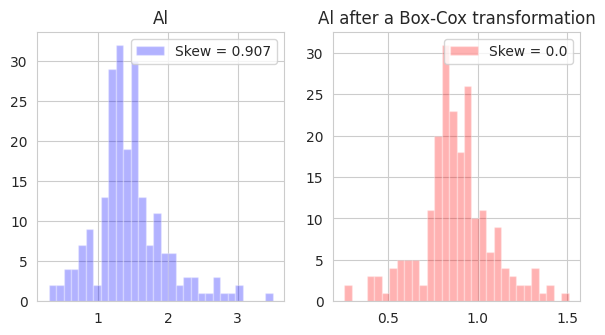

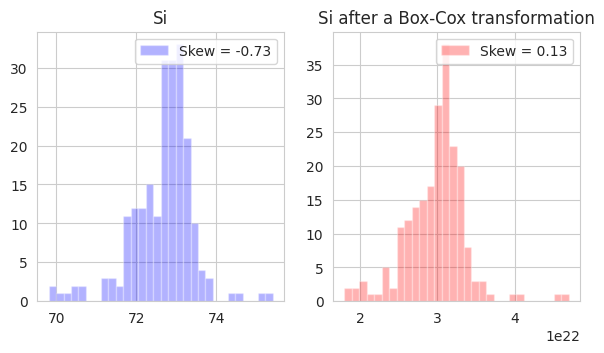

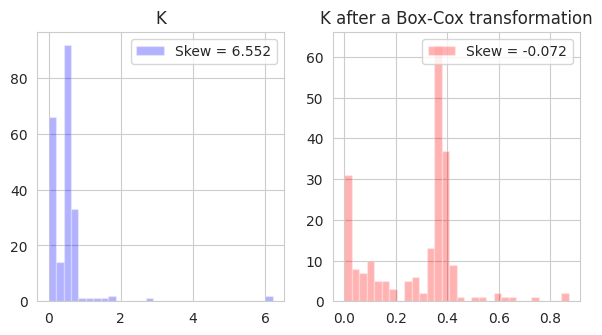

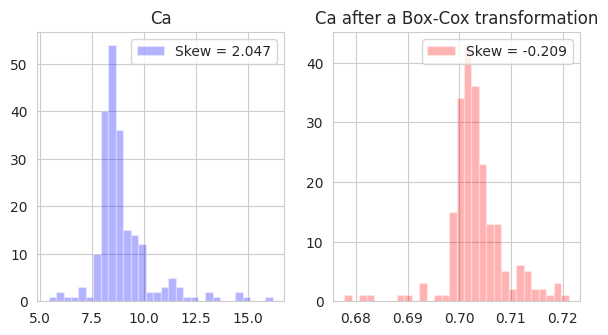

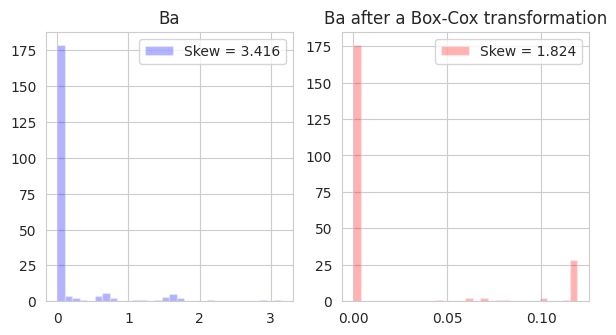

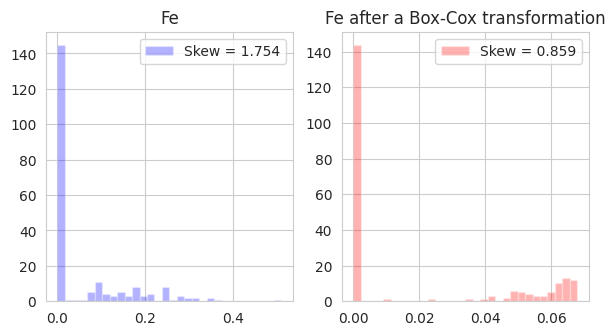

In [26]:
for feature in features:
    fig, ax = plt.subplots(1,2,figsize=(7,3.5))    
    ax[0].hist(df[feature], color='blue', bins=30, alpha=0.3, label='Skew = %s' %(str(round(df[feature].skew(),3))) )
    ax[0].set_title(str(feature))   
    ax[0].legend(loc=0)
    ax[1].hist(df_bc[feature], color='red', bins=30, alpha=0.3, label='Skew = %s' %(str(round(df_bc[feature].skew(),3))) )
    ax[1].set_title(str(feature)+' after a Box-Cox transformation')
    ax[1].legend(loc=0)
    plt.show()

In [27]:
# check if skew is closer to zero after a box-cox transform
for feature in features:
    delta = np.abs( df_bc[feature].skew() / df[feature].skew() )
    if delta < 1.0 :
        print('Feature %s is less skewed after a Box-Cox transform' %(feature))
    else:
        print('Feature %s is more skewed after a Box-Cox transform'  %(feature))

Feature RI is less skewed after a Box-Cox transform
Feature Na is less skewed after a Box-Cox transform
Feature Mg is less skewed after a Box-Cox transform
Feature Al is less skewed after a Box-Cox transform
Feature Si is less skewed after a Box-Cox transform
Feature K is less skewed after a Box-Cox transform
Feature Ca is less skewed after a Box-Cox transform
Feature Ba is less skewed after a Box-Cox transform
Feature Fe is less skewed after a Box-Cox transform


The Box-Cox transform seems to do a good job in reducing the skews of the different distributions of features. However, it does not lead to the normalization of the feature distributions. Trial and error showed that it doesn't lead to an improvement of the performance of the used algorithms. Next, let's explore dimensionality reduction techniques.

# 4. Evaluate Algorithms

- Dimensionality reduction

XGBoost

Elapsed time to train XGBoost: 0.108 seconds


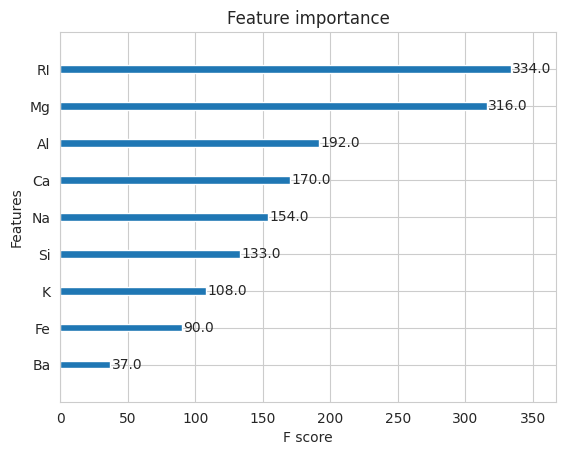

In [48]:
import time
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from xgboost.plotting import plot_importance
from sklearn.preprocessing import LabelEncoder

# Convert class labels to the expected format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

model_importances = XGBClassifier()
start = time.time()
model_importances.fit(X_train, y_train_encoded)
print('Elapsed time to train XGBoost: %.3f seconds' % (time.time() - start))
plot_importance(model_importances)
plt.show()


It appears that no main features dominate the importance in the XGBoost modeling of the problem.

PCA

Let's go ahead and perform a PCA on the features to decorrelate the ones that are linearly dependent and then let's plot the cumulative explained variance.

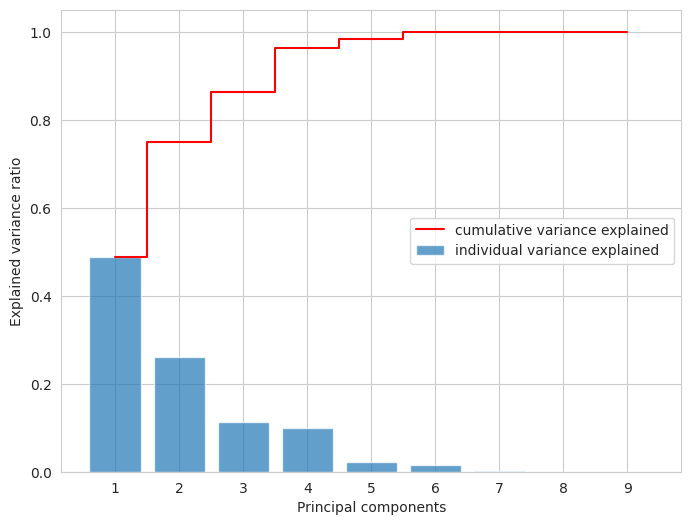

PC1 Cumulative variance: 48.827%
PC2 Cumulative variance: 74.979%
PC3 Cumulative variance: 86.263%
PC4 Cumulative variance: 96.264%
PC5 Cumulative variance: 98.370%
PC6 Cumulative variance: 99.836%
PC7 Cumulative variance: 99.977%
PC8 Cumulative variance: 100.000%
PC9 Cumulative variance: 100.000%


In [56]:
pca = PCA(random_state=seed)
pca.fit(X_train)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cum_var_exp) + 1), var_exp, align='center', label='individual variance explained', alpha=0.7)
plt.step(range(1, len(cum_var_exp) + 1), cum_var_exp, where='mid', label='cumulative variance explained', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1, len(var_exp) + 1, 1))
plt.legend(loc='center right')
plt.show()

# Cumulative variance explained
for i, value in enumerate(cum_var_exp):
    print("PC" + str(i + 1), "Cumulative variance: %.3f%%" % (value * 100))


It appears that about 99 % of the variance can be explained with the first 5 principal components. However feeding the PCA features to the learning algorithms did not contribute to a better performance. This might be due to the non-linearites that PCA is not able to capture.

- Compare Algorithms

Now it's time to compare the performance of different machine learning algorithms. We'll use 10-folds cross-validation to assess the performance of each model with the metric being the classification accuracy. Pipelines encompassing Standarization and PCA are used in order to avoid data leakage. Standarization is not performed for tree-based methods.

SVC: 71.339869 (+/- 8.089869) performed in 0.073267 seconds
KNN: 65.490196 (+/- 8.908092) performed in 0.068064 seconds
RF: 83.104575 (+/- 9.448967) performed in 2.397475 seconds
Ada: 48.464052 (+/- 10.040767) performed in 2.546449 seconds
ET: 79.477124 (+/- 6.125686) performed in 2.968216 seconds
GB: 78.267974 (+/- 10.588689) performed in 4.719439 seconds
LR: 62.581699 (+/- 6.977335) performed in 0.122140 seconds


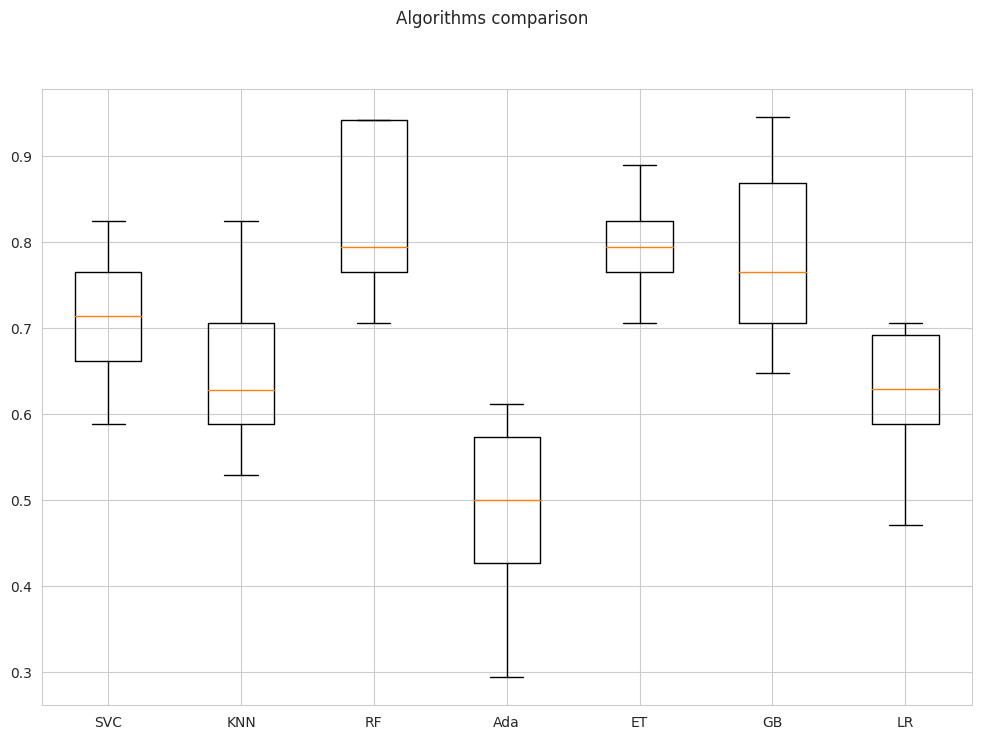

In [69]:
from time import time
from IPython.display import display

n_components = 5
pipelines = []
n_estimators = 200

#print(df.shape)
pipelines.append(('SVC',
                  Pipeline([
                      ('sc', StandardScaler()),
                      # ('pca', PCA(n_components=n_components, random_state=seed)),
                      ('SVC', SVC(random_state=seed))])
                  ))


pipelines.append(('KNN',
                  Pipeline([
                      ('sc', StandardScaler()),
                      # ('pca', PCA(n_components=n_components, random_state=seed)),
                      ('KNN', KNeighborsClassifier())]))
                 )
pipelines.append(('RF',
                  Pipeline([
                      ('sc', StandardScaler()),
                      # ('pca', PCA(n_components=n_components, random_state=seed)),
                      ('RF', RandomForestClassifier(random_state=seed, n_estimators=n_estimators))])
                  ))


pipelines.append(('Ada',
                  Pipeline([
                      ('sc', StandardScaler()),
                      # ('pca', PCA(n_components=n_components, random_state=seed)),
                      ('Ada', AdaBoostClassifier(random_state=seed, n_estimators=n_estimators))])
                  ))

pipelines.append(('ET',
                  Pipeline([
                      ('sc', StandardScaler()),
                      # ('pca', PCA(n_components=n_components, random_state=seed)),
                      ('ET', ExtraTreesClassifier(random_state=seed, n_estimators=n_estimators))])
                  ))
pipelines.append(('GB',
                  Pipeline([
                      ('sc', StandardScaler()),
                      # ('pca', PCA(n_components=n_components, random_state=seed)),
                      ('GB', GradientBoostingClassifier(random_state=seed))])
                  ))

pipelines.append(('LR',
                  Pipeline([
                      ('sc', StandardScaler()),
                      # ('pca', PCA(n_components=n_components, random_state=seed)),
                      ('LR', LogisticRegression(random_state=seed))])
                  ))

results, names, times = [], [], []
num_folds = 10
scoring = 'accuracy'

for name, model in pipelines:
    start = time()
    kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
    t_elapsed = time() - start
    results.append(cv_results)
    names.append(name)
    times.append(t_elapsed)
    msg = "%s: %f (+/- %f) performed in %f seconds" % (name, 100 * cv_results.mean(),
                                                       100 * cv_results.std(), t_elapsed)
    print(msg)

fig = plt.figure(figsize=(12, 8))
fig.suptitle("Algorithms comparison")
ax = fig.add_subplot(1, 1, 1)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


Observation: The best performances are achieved by RF. However, RF also yields a wide distribution. It is worthy to continue our study by tuning RF.

Logistic Regression performs badly. This might be due to the fact that the data is not normally distributed as these algorithms perform well when data that is normally distributed.